<a href="https://colab.research.google.com/github/SwagataDas123/feature-selection/blob/main/New_version_of_Modified_All_datasets_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
import seaborn as sns
import math
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
import statistics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score,classification_report, confusion_matrix

In [ ]:
arr=[]#mi and chi2
arr1=[]#mi and correlation
arr2=[]#correlation and chi2

The function where the main processing takes place and it returns similarity for all the three pairs of methods

In [ ]:
def func(sona):
  #data preprocessing
  label_encoder = preprocessing.LabelEncoder()
  #sona.rename(columns={'class ': 'class'}, inplace=True)#for pageblocks dataset
  sona["class"]= label_encoder.fit_transform(sona["class"])

  """#for weather2 dataset
  sona['outlook']= label_encoder.fit_transform(sona['outlook'])
  sona['windy']= label_encoder.fit_transform(sona['windy'])"""

  """sona['Marital Status']= label_encoder.fit_transform(sona['Marital Status'])#for customers1 dataset
  sona.head(5)"""

  """sona.info()#checking null values
  sona=sona.dropna()#removing null values(for vehicle1 dataset)"""

  """#for dermatology dataset
  column_name = 'Age'

  #Specify the string you want to check for search_string = "?"
  if '?' in sona[column_name].astype(str).values:
    print(f"The column '{column_name}' contains '?'")
    sona['Age'] = pd.to_numeric(sona['Age'], errors='coerce')

  #Identify rows where the numeric column contains '?'
  rows_with_question_mark = sona['Age'].isna()

  #Drop rows with '?' in the numeric column
  sona = sona[~rows_with_question_mark]

  sona['Age'] = pd.to_numeric(sona['Age'], errors='coerce')"""


  X=sona.drop("class",axis=1)
  y=sona["class"]
  (sona < 0).any().any()#negative value in dataset

  #picking up 20% of the columns
  k2=(20*(sona.shape[1]))/100.0
  k1=math.ceil(k2)

  #train test split
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
  X_train.shape,X_test.shape

  #STANDARDIZATION
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.transform(X_test)

  X_train = pd.DataFrame(X_train)
  y_train = pd.DataFrame(y_train)
  X_test=pd.DataFrame(X_test)

  #MUTUAL INFORMATION
  mutual_info=mutual_info_classif(X_train,y_train)
  mutual_info
  mutual_info=pd.Series(mutual_info)
  a={}
  b=[]
  a=mutual_info.sort_values(ascending=False)#sorting
  #getting the index of sorted mutual info columns
  b=a.keys()
  print(b)
  #l=len(b)
  #picking up 20% of the columns
  mi=b[1:k1+1]

  #train test split
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
  X_train.shape,X_test.shape

  #STANDARDIZATION
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.transform(X_test)

  #Chi Square Test
  f_p_values=chi2(abs(X_train),y_train)
  f_values=pd.Series(f_p_values[0])#f values

  p_values=pd.Series(f_p_values[1])#p values
  #we are sorting f values in descending order
  a1 = f_values.sort_values(ascending=False)
  b1=a1.keys()
  #picking up 20% of the columns
  ch=b1[1:k1+1]
  #print('b1=',b1)
  #l=len(b1)
  # print('l',l)

  arr.append(mi)
  arr.append(ch)
  list1=mi[:]
  list2=ch[:]
  #similarity calculation between MI and CHI2
  count_dict1 = {}
    # Dictionary to count occurrences of items in list2
  count_dict2 = {}
  for item in list1:
    if item in count_dict1:
        count_dict1[item] += 1
    else:
        count_dict1[item] = 1

    # Count items in list2
  for item in list2:
    if item in count_dict2:
        count_dict2[item] += 1
    else:
        count_dict2[item] = 1

    # Calculate the number of common items (t)
  common_count = 0
  for item in count_dict1:
    if item in count_dict2:
      common_count += min(count_dict1[item], count_dict2[item])

    # Calculate the number of unique items
  unique_count = len(count_dict1) + len(count_dict2) - 2 * common_count
  #similarity between mi and chi2
  if(unique_count!=0):
    sim1=common_count/unique_count
  else:
    sim1=0
  print(sim1)

  #print("Number of common items (t):", common_count)
  #print("Number of unique items:", unique_count)

  #train test split
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
  X_train.shape,X_test.shape

  #NORMALISATION
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.transform(X_test)

  X_train = pd.DataFrame(X_train)
  y_train = pd.DataFrame(y_train)
  X_test=pd.DataFrame(X_test)

  #correlation function
  def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if(corr_matrix.iloc[i,j]>threshold):
          #colname=corr_matrix.columns[i]
          col_corr.add(corr_matrix.columns[i])
    return col_corr
    #correlation function ends

  corr_features=correlation(X_train,0.8)#passing  parameters to correlation function
  #corr_features

  new_dataset = sona.drop(list(set(corr_features) & set(sona.columns)), axis=1)#drop those features having correlation greater than 0.8 threshold
  #new dataset
  #new_dataset.head(5)

  #sorting the correlations list
  corr_matrix = new_dataset.corr()
  sorted_correlations = corr_matrix["class"].sort_values(ascending=False)
  sorted_columns = sorted_correlations.index.tolist()

  #b1=ch2.keys()
  column_indices = [new_dataset.columns.get_loc(col) for col in sorted_columns]
  cr=column_indices[1:k1+1]#picking up 20% of the columns
  #print(cfd)
  arr1.append(mi)
  arr1.append(cr)
  list1=mi[:]
  list3=cr[:]

  #similarity calculation between MI and CORRELATION
  count_dict3 = {}
    # Dictionary to count occurrences of items in list2
  count_dict4 = {}
  for item in list1:
    if item in count_dict3:
        count_dict3[item] += 1
    else:
        count_dict3[item] = 1

    # Count items in list2
  for item in list3:
    if item in count_dict4:
        count_dict4[item] += 1
    else:
        count_dict4[item] = 1

    # Calculate the number of common items (t)
  common_count1 = 0
  for item in count_dict3:
    if item in count_dict4:
      common_count1 += min(count_dict3[item], count_dict4[item])

    # Calculate the number of unique items
  unique_count1 = len(count_dict3) + len(count_dict4) - 2 * common_count1
  #similarity between mi and chi2
  if(unique_count1!=0):
    sim2=common_count1/unique_count1
  else:
    sim2=0
  print(sim2)

  arr2.append(ch)
  arr2.append(cr)
  list3=cr[:]
  list2=ch[:]
  #similarity calculation between CHI and CORRELATION
  count_dict5 = {}
    # Dictionary to count occurrences of items in list2
  count_dict6 = {}
  for item in list2:
    if item in count_dict5:
        count_dict5[item] += 1
    else:
        count_dict5[item] = 1

    # Count items in list2
  for item in list3:
    if item in count_dict6:
        count_dict6[item] += 1
    else:
        count_dict6[item] = 1

    # Calculate the number of common items (t)
  common_count2 = 0
  for item in count_dict5:
    if item in count_dict6:
      common_count2 += min(count_dict5[item], count_dict6[item])

    # Calculate the number of unique items
  unique_count2 = len(count_dict5) + len(count_dict6) - 2 * common_count2
  #similarity between mi and chi2
  if(unique_count2!=0):
    sim3=common_count2/unique_count2
  else:
    sim3=0
  print(sim3)

  return sim1,sim2,sim3,k1#returning similarity,limit
  #function ends

Loading the data

In [ ]:
##data loading
#data=pd.read_csv("/content/drive/MyDrive/datasets/CTG.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/Dry_Bean.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/Ecoli.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/ILPD.csv",encoding='unicode_escape')
#data=pd.read_csv("/content/drive/MyDrive/datasets/apndcts.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/btissue.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/cleave.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/customers1.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/dermatology.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/digits.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/glass.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/isolet.csv")
data=pd.read_csv("/content/drive/MyDrive/datasets-20231012T151808Z-001/datasets/lymphography.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/lymphography.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/mdlon.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/mfeat-karhunen.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/pageblokcs.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/pima.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/sonar.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/texture.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/vehicle1.csv")
#data=pd.read_csv("/content/drive/MyDrive/datasets/weather2.csv")

Calling the function 20 times

In [ ]:
sl1=[]
sl2=[]
sl3=[]

for _ in range(0,20):#iterating for 20 times
  #func is the function where the main work that is data cleaning,feature selections and similarity calculation is done
  sub1,sub2,sub3,limit = func(data)#calling the function 20 times to get 20 similarities in both cases
  sl1.append(sub1)#similarity list between MI and CHI2
  sl2.append(sub2)#similarity list between MI and Correlation
  sl3.append(sub3)#similarity list between CHI2 and Correlation

print('arr',arr)
print('arr1',arr1)
print('arr2',arr2)
print(sl1)
print(sl2)
print(sl3)
print(limit)

#extracting one final set
  #print('arr1',arr1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index([9, 1, 8, 10, 12, 6, 17, 0, 13, 11, 3, 4, 14, 15, 7, 5, 2, 16], dtype='int64')
0.5
0.16666666666666666
0.16666666666666666
Index([9, 8, 10, 12, 11, 1, 4, 17, 14, 6, 3, 16, 13, 0, 7, 5, 2, 15], dtype='int64')
0.5
0.16666666666666666
0.16666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index([10, 12, 5, 6, 1, 8, 17, 9, 14, 7, 15, 11, 13, 2, 4, 0, 3, 16], dtype='int64')
0.5
0.16666666666666666
0.16666666666666666
Index([9, 17, 6, 12, 1, 8, 5, 10, 3, 2, 13, 0, 14, 4, 7, 11, 15, 16], dtype='int64')
0.5
0.5
0.16666666666666666
Index([9, 12, 17, 10, 8, 1, 5, 4, 6, 13, 2, 16, 11, 3, 0, 7, 14, 15], dtype='int64')
0.5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.5
0.16666666666666666
Index([17, 12, 4, 9, 10, 8, 6, 1, 7, 13, 5, 16, 14, 11, 0, 15, 2, 3], dtype='int64')
0.5
0.0
0.16666666666666666
Index([4, 0, 6, 12, 9, 8, 1, 10, 11, 17, 13, 14, 15, 5, 3, 7, 2, 16], dtype='int64')
0.5
0.16666666666666666
0.16666666666666666
Index([10, 9, 12, 1, 6, 4, 8, 17, 5, 0, 11, 15, 3, 7, 13, 2, 14, 16], dtype='int64')
0.5
0.16666666666666666
0.16666666666666666
Index([8, 1, 9, 12, 10, 2, 17, 6, 14, 0, 13, 3, 4, 15, 11, 7, 5, 16], dtype='int64')
0.5
0.0
0.16666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index([4, 6, 9, 3, 12, 5, 17, 10, 1, 8, 7, 13, 15, 14, 11, 0, 2, 16], dtype='int64')
1.5
0.16666666666666666
0.16666666666666666
Index([10, 6, 12, 9, 17, 1, 0, 4, 13, 7, 8, 14, 5, 3, 11, 2, 15, 16], dtype='int64')
0.5
0.5
0.16666666666666666
Index([9, 12, 1, 10, 4, 7, 6, 5, 8, 15, 17, 14, 11, 0, 3, 13, 2, 16], dtype='int64')
0.5


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0
0.16666666666666666
Index([1, 9, 10, 12, 4, 8, 17, 6, 16, 13, 0, 14, 15, 3, 7, 5, 11, 2], dtype='int64')
0.5
0.0
0.16666666666666666
Index([10, 9, 12, 1, 0, 8, 6, 17, 15, 13, 7, 11, 4, 14, 5, 3, 2, 16], dtype='int64')
0.16666666666666666
0.0
0.16666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index([10, 12, 1, 9, 8, 4, 0, 17, 6, 7, 14, 13, 16, 11, 5, 3, 2, 15], dtype='int64')
0.16666666666666666
0.16666666666666666
0.16666666666666666
Index([9, 1, 4, 15, 12, 8, 5, 10, 11, 14, 0, 6, 7, 13, 17, 2, 3, 16], dtype='int64')
0.16666666666666666
0.0
0.16666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index([9, 10, 12, 6, 1, 0, 5, 8, 14, 17, 4, 3, 7, 15, 13, 2, 11, 16], dtype='int64')
1.5
0.16666666666666666
0.16666666666666666
Index([5, 4, 12, 9, 10, 6, 0, 8, 17, 1, 2, 7, 13, 15, 11, 3, 14, 16], dtype='int64')
0.5
0.0
0.16666666666666666
Index([12, 9, 10, 1, 17, 8, 13, 11, 15, 4, 7, 14, 6, 3, 5, 0, 2, 16], dtype='int64')
0.16666666666666666
0.16666666666666666
0.16666666666666666
Index([5, 9, 12, 1, 10, 17, 8, 6, 3, 4, 15, 0, 11, 13, 16, 7, 2, 14], dtype='int64')
0.5
0.0
0.16666666666666666
arr [Index([1, 8, 10, 12], dtype='int64'), Index([6, 12, 3, 10], dtype='int64'), Index([8, 10, 12, 11], dtype='int64'), Index([6, 12, 3, 10], dtype='int64'), Index([12, 5, 6, 1], dtype='int64'), Index([6, 12, 3, 10], dtype='int64'), Index([17, 6, 12, 1], dtype='int64'), Index([6, 12, 3, 10], dtype='int64'), Index([12, 17, 10, 8], dtype='int64'), Index([6, 12, 3, 10], dtype='int64'), Index([12, 4, 9, 10], dtype='int64'), Index([6, 12, 3, 10], dtype='int64'), Index([0, 6, 12, 9], dtype='int64'), I

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Top most frequent items for all three pairs of methods

In [ ]:
#top most frequent items between MI and CHI2
def count_item_frequencies(list_of_lists):
    # Dictionary to store item frequencies
    frequency_dict = {}

    # Count frequencies of items in the list of lists
    for sublist in list_of_lists:
        for item in sublist:
            if item in frequency_dict:
                frequency_dict[item] += 1
            else:
                frequency_dict[item] = 1

    return frequency_dict

def extract_top_most_frequent_items(frequency_dict, k):
    sorted_items = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

    # Extract the top k most frequent items
    top_k_items = sorted_items[:k]

    # Extract just the items from the top k items
    top_k_item_list = [item for item, frequency in top_k_items]

    return top_k_item_list

frequency_dict = count_item_frequencies(arr)
top_most_frequent_items = extract_top_most_frequent_items(frequency_dict, limit)

print("Top most frequent items between MI and CHI2:")
print(top_most_frequent_items)


Top most frequent items between MI and CHI2:
[12, 10, 6, 3]


In [ ]:
#top most frequent items between MI and Correlation
def count_item_frequencies1(list_of_lists):
    # Dictionary to store item frequencies
    frequency_dict = {}

    # Count frequencies of items in the list of lists
    for sublist in list_of_lists:
        for item in sublist:
            if item in frequency_dict:
                frequency_dict[item] += 1
            else:
                frequency_dict[item] = 1

    return frequency_dict

def extract_top_most_frequent_items1(frequency_dict, k):
    sorted_items = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

    # Extract the top k most frequent items
    top_k_items = sorted_items[:k]

    # Extract just the items from the top k items
    top_k_item_list = [item for item, frequency in top_k_items]

    return top_k_item_list

frequency_dict1 = count_item_frequencies1(arr1)
top_most_frequent_items1 = extract_top_most_frequent_items1(frequency_dict1, limit)

print("Top most frequent items between MI and Correlation:")
print(top_most_frequent_items1)

Top most frequent items between MI and Correlation:
[6, 8, 17, 14]


In [ ]:
#top most frequent items between CHI2 and Correlation
def count_item_frequencies2(list_of_lists):
    # Dictionary to store item frequencies
    frequency_dict = {}

    # Count frequencies of items in the list of lists
    for sublist in list_of_lists:
        for item in sublist:
            if item in frequency_dict:
                frequency_dict[item] += 1
            else:
                frequency_dict[item] = 1

    return frequency_dict

def extract_top_most_frequent_items2(frequency_dict, k):
    sorted_items = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)

    # Extract the top k most frequent items
    top_k_items = sorted_items[:k]

    # Extract just the items from the top k items
    top_k_item_list = [item for item, frequency in top_k_items]

    return top_k_item_list

frequency_dict2 = count_item_frequencies2(arr2)
top_most_frequent_items2 = extract_top_most_frequent_items2(frequency_dict2, limit)

print("Top most frequent items between CHI2 and Correlation:")
print(top_most_frequent_items2)

Top most frequent items between CHI2 and Correlation:
[6, 12, 3, 10]


In [ ]:
#data preprocessing
label_encoder = preprocessing.LabelEncoder()
#data.rename(columns={'class ': 'class'}, inplace=True)#for pageblocks dataset
data["class"]= label_encoder.fit_transform(data["class"])

"""#for weather2 dataset
data['outlook']= label_encoder.fit_transform(data['outlook'])
data['windy']= label_encoder.fit_transform(data['windy'])"""

"""data['Marital Status']= label_encoder.fit_transform(data['Marital Status'])#for customers1 dataset
data.head(5)"""

"""data.info()#checking null values
data=data.dropna()#removing null values(for vehicle1 dataset)"""

"""#for dermatology dataset
column_name = 'Age'

#Specify the string you want to check for search_string = "?"
if '?' in data[column_name].astype(str).values:
  print(f"The column '{column_name}' contains '?'")
  data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

#Identify rows where the numeric column contains '?'
rows_with_question_mark = data['Age'].isna()

#Drop rows with '?' in the numeric column
data=data[~rows_with_question_mark]

data['Age'] = pd.to_numeric(data['Age'], errors='coerce')"""



X=data.drop("class",axis=1)
y=data["class"]

#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

#NORMALISATION
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test=pd.DataFrame(X_test)

Precision and Recall for three pairs of methods

In [ ]:
#precision recall for MI and CHI2

X_train.columns = [i for i in range(X_train.shape[1])]
X_test.columns = [i for i in range(X_test.shape[1])]

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train[top_most_frequent_items],y_train)
y_nu = gradient_booster.predict(X_test[top_most_frequent_items])

subset_score1 = round(accuracy_score(y_test,y_nu)*100,2)
precision1=round(precision_score(y_test,y_nu,average='weighted')*100,2)
recall1=round(recall_score(y_test,y_nu,average='weighted')*100,2)

print(precision1)
print(recall1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


68.5
64.44


In [ ]:
#precision recall for MI and Correlation

X_train.columns = [i for i in range(X_train.shape[1])]
X_test.columns = [i for i in range(X_test.shape[1])]

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train[top_most_frequent_items1],y_train)
y_nu = gradient_booster.predict(X_test[top_most_frequent_items1])

subset_score2 = round(accuracy_score(y_test,y_nu)*100,2)
precision2=round(precision_score(y_test,y_nu,average='weighted')*100,2)
recall2=round(recall_score(y_test,y_nu,average='weighted')*100,2)

print(precision2)
print(recall2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


82.47
84.44


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#precision recall for CHI2 and Correlation

X_train.columns = [i for i in range(X_train.shape[1])]
X_test.columns = [i for i in range(X_test.shape[1])]

gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train[top_most_frequent_items2],y_train)
y_nu = gradient_booster.predict(X_test[top_most_frequent_items2])

subset_score3 = round(accuracy_score(y_test,y_nu)*100,2)
precision3=round(precision_score(y_test,y_nu,average='weighted')*100,2)
recall3=round(recall_score(y_test,y_nu,average='weighted')*100,2)

print(precision3)
print(recall3)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


68.5
64.44


Average similarity for three pairs of methods

In [ ]:
avgs1=sum(sl1)/20.0
print(sl1)
print(avgs1)#average similarity list between MI and CHI2

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 0.5, 0.5, 0.5, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 1.5, 0.5, 0.16666666666666666, 0.5]
0.5333333333333333


In [ ]:
avgs2=sum(sl2)/20.0
print(sl2)
print(avgs2)#average similarity list between MI and Correlation

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.5, 0.5, 0.0, 0.16666666666666666, 0.16666666666666666, 0.0, 0.16666666666666666, 0.5, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.16666666666666666, 0.0, 0.16666666666666666, 0.0]
0.14999999999999997


In [ ]:
avgs3=sum(sl3)/20.0
print(sl3)
print(avgs3)#average similarity list between CHI2 and Correlation

[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
0.1666666666666666


Below are all the graphs for average similarity, average precision and average recall given for MI and CHI2 for different test sizes of 10%,20%,30%,40%,50%

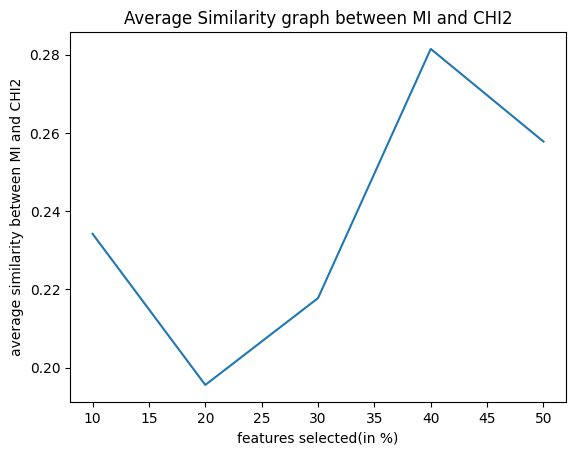

In [ ]:
#average similarity graph
plt.title('Average Similarity graph between MI and CHI2')
ypoints = np.array([0.2342053196,0.1955828811,0.2177665702,0.2814583456,0.257779573])
xpoints = np.array([10,20,30,40,50])
plt.xlabel('features selected(in %)')
plt.ylabel('average similarity between MI and CHI2')
plt.plot(xpoints, ypoints)
plt.show()

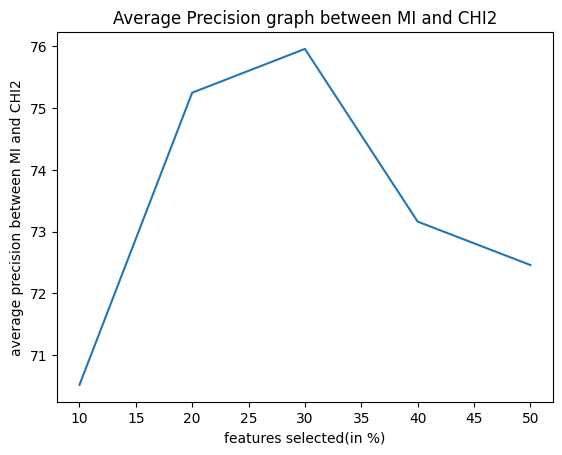

In [ ]:
plt.title('Average Precision graph between MI and CHI2')
ypoints = np.array([70.5147619,75.25095238,75.96047619,73.16190476,72.45809524])
xpoints = np.array([10,20,30,40,50])
plt.xlabel('features selected(in %)')
plt.ylabel('average precision between MI and CHI2')
plt.plot(xpoints, ypoints)
plt.show()

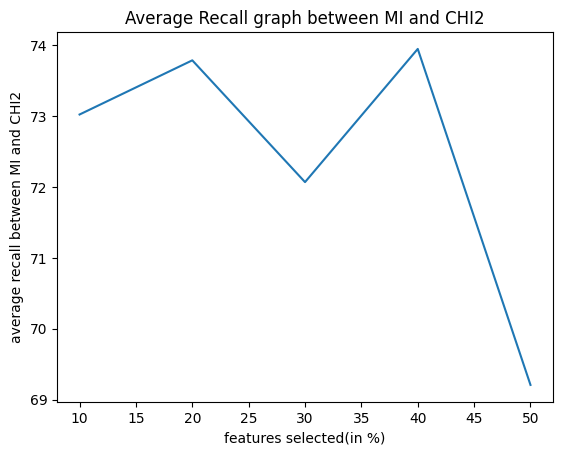

In [ ]:
plt.title('Average Recall graph between MI and CHI2')
ypoints = np.array([73.02238095,73.78666667,72.06857143,73.94761905,69.20714286])
xpoints = np.array([10,20,30,40,50])
plt.xlabel('features selected(in %)')
plt.ylabel('average recall between MI and CHI2')
plt.plot(xpoints, ypoints)
plt.show()

Below are all the graphs for average similarity, average precision and average recall given for MI and CORRELATION for different test sizes of 10%,20%,30%,40%,50%

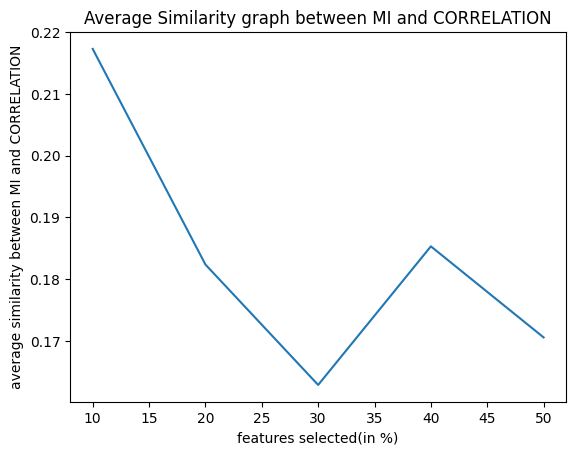

In [ ]:
#average similarity graph
plt.title('Average Similarity graph between MI and CORRELATION')
ypoints = np.array([0.2172896278,0.1823670043,0.1628612491,0.1853075916,0.170557552])
xpoints = np.array([10,20,30,40,50])
plt.xlabel('features selected(in %)')
plt.ylabel('average similarity between MI and CORRELATION')
plt.plot(xpoints, ypoints)
plt.show()

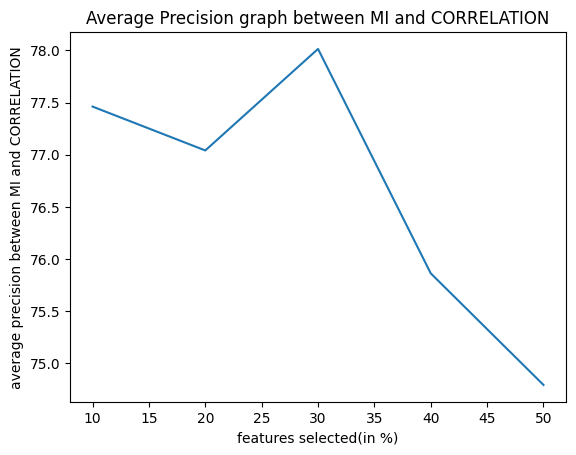

In [ ]:
plt.title('Average Precision graph between MI and CORRELATION')
ypoints = np.array([77.46095238,77.04047619,78.01380952,75.86238095,74.79285714])
xpoints = np.array([10,20,30,40,50])
plt.xlabel('features selected(in %)')
plt.ylabel('average precision between MI and CORRELATION')
plt.plot(xpoints, ypoints)
plt.show()

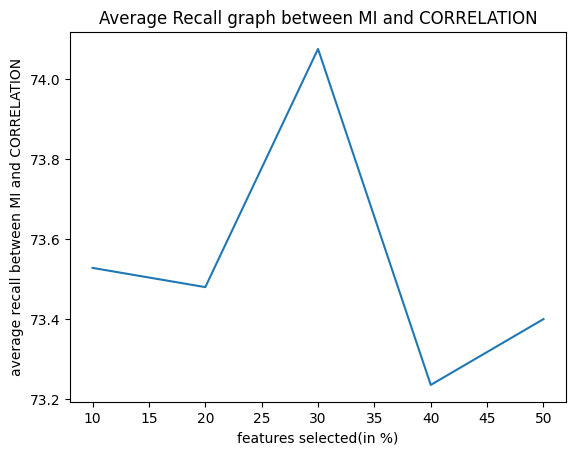

In [ ]:
plt.title('Average Recall graph between MI and CORRELATION')
ypoints = np.array([73.52761905,73.47952381,74.07571429,73.2347619,73.39952381])
xpoints = np.array([10,20,30,40,50])
plt.xlabel('features selected(in %)')
plt.ylabel('average recall between MI and CORRELATION')
plt.plot(xpoints, ypoints)
plt.show()

Below are all the graphs for average similarity, average precision and average recall given for CHI2 and CORRELATION for different test sizes of 10%,20%,30%,40%,50%

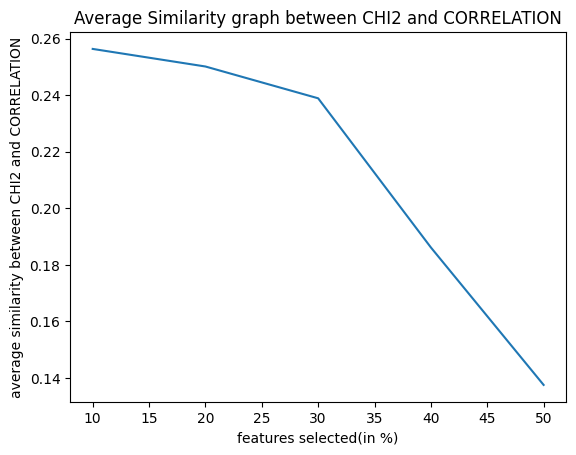

In [ ]:
#average similarity graph
plt.title('Average Similarity graph between CHI2 and CORRELATION')
ypoints = np.array([0.2563315925,0.2501171961,0.2388731719,0.1861405536,0.1375322856])
xpoints = np.array([10,20,30,40,50])
plt.xlabel('features selected(in %)')
plt.ylabel('average similarity between CHI2 and CORRELATION')
plt.plot(xpoints, ypoints)
plt.show()

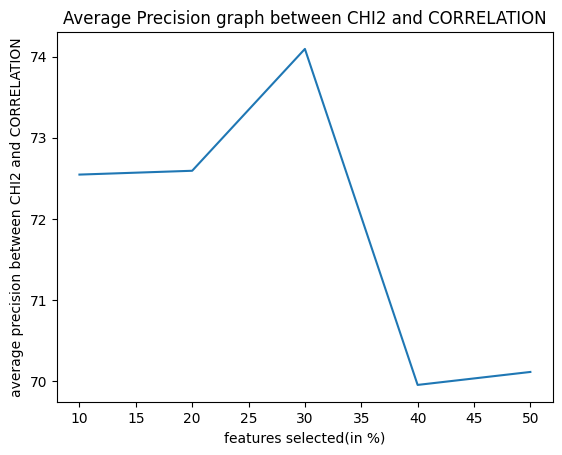

In [ ]:
plt.title('Average Precision graph between CHI2 and CORRELATION')
ypoints = np.array([72.54571429,72.59285714,74.09571429,69.95142857,70.11142857])
xpoints = np.array([10,20,30,40,50])
plt.xlabel('features selected(in %)')
plt.ylabel('average precision between CHI2 and CORRELATION')
plt.plot(xpoints, ypoints)
plt.show()

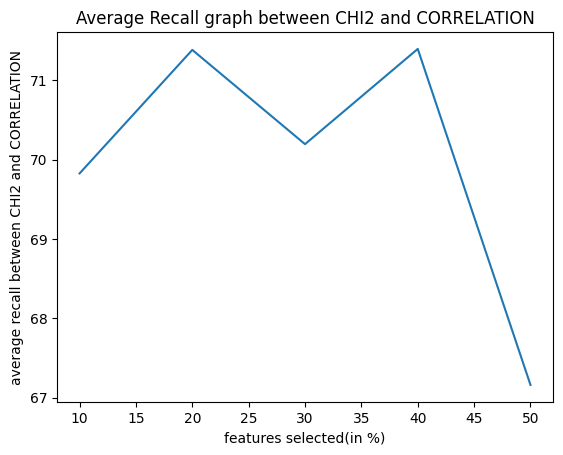

In [ ]:
plt.title('Average Recall graph between CHI2 and CORRELATION')
ypoints = np.array([69.8247619,71.38,70.19333333,71.39238095,67.16190476])
xpoints = np.array([10,20,30,40,50])
plt.xlabel('features selected(in %)')
plt.ylabel('average recall between CHI2 and CORRELATION')
plt.plot(xpoints, ypoints)
plt.show()